# 机器学习基础
- linear regression推导
- 实现梯度下降，及其可视化

## 1. generate data and save into disk

(1000,) (1000,)


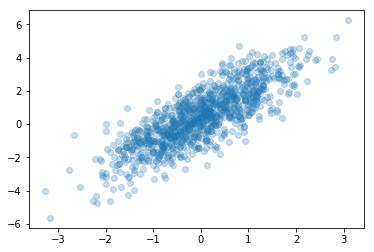

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
def generate_data():
    size = 1000
    X = np.random.normal(0,1,size)
    Y = 1.5*X + 0.5 + np.random.normal(0,1,size)

    print(X.shape, Y.shape)
    plt.figure('data')
    plt.scatter(X,Y,alpha=0.25)
    plt.show()

    data = pd.DataFrame({'X':X, 'Y':Y})
    data.head()
    data.to_csv('data/toy_training_set.csv')

generate_data()

## 2. read data form file

In [2]:
data = pd.read_csv('data/toy_training_set.csv')
X = data['X']
ones = np.ones_like(X)
X = np.c_[X,ones]
Y = data['Y']
data.head()

,Unnamed: 0,X,Y
0,0,-0.698220,0.960410
1,1,0.525128,2.840613
2,2,1.700490,5.044340
3,3,0.762780,1.944993
4,4,1.306611,3.153637


assumption for linear regression:

$Y\sim N(wx,\sigma^2)\equiv P_{w,\sigma^2}(y|x) = \frac{1}{\sqrt{2\pi\sigma^2}}exp\left[-\frac{(y-wx)^2}{2\sigma^2}\right]$

MLE for all instanse in the training set with the size of n:

$\hat{w} = argmax_w \prod_{i=1}^n P_{w,\sigma^2}(y_i|x_i) = argmax_w \frac{1}{\sqrt{2\pi\sigma^2}}\prod_{i=1}^n exp\left[-\frac{(y_i-wx_i)^2}{2\sigma^2}\right]$

take logrithm on both sides:

$\hat{w} = argmax_w \sum_{i=1}^n - [(y_i-wx_i)^2 - 2\sigma^2] = argmin_w \sum_{i=1}^n (y_i-wx_i)^2 $



so linear regression model:

$y=\hat{w}x \qquad s.t. \quad \hat{w} =argmin_w \sum_{i=1}^n (y_i-wx_i)^2$

define the loss function:

$L(w) = \sum_{i=1}^n (y_i-wx_i)^2 = ||Xw-Y||^2 = ||N((\hat{w}-w)X,\sigma^2)||^2$

gradient of loss function

$\bigtriangledown L =\frac{\partial{L}}{\partial{w}} = 2X^T(Xw-Y)$

references of matrix computation: https://en.wikipedia.org/wiki/Computational_complexity_of_mathematical_operations

---

1.close form solution:

   $\bigtriangledown L = 0 \qquad \equiv \qquad  2X^T(Xw-Y) = 0$
   
   $X_{n*d},w_{d*1},Y_{n*1}$

   $w = (X^TX)^{-1}X^TY$

   complexity ananlysis:

   $temp1_{d*d} = X^TX \rightarrow O(n^{2.3728639})$

   $temp2_{d*d} = temp1^{-1}\rightarrow O(n^{2.3728639})$

   $temp3_{d*1}=X^TY \rightarrow O(n^{d*n*1})$

   $result = temp2*temp3 \rightarrow O(d*d*1)$

   overall complexity is $O(n^{2.3728639})$


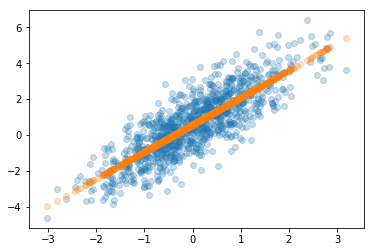

estimated w: [1.51149241 0.58352888] with loss 1012.591422249268


In [3]:
w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)

def get_loss(w, X, Y):
    err = X.dot(w)-Y
    return err.T.dot(err)

def visualization(w):
    global X 
    global Y
    Y_pred = X.dot(w)
    plt.scatter(data['X'],data['Y'],alpha=0.25)
    plt.scatter(X[:,0],Y_pred,alpha=0.25)
    plt.show()
    print('estimated w:',w,'with loss', get_loss(w, X, Y))

visualization(w)

---
2.gradient desent

   $L(w) = (Xw-Y)^T(Xw-Y)$
   
   $\bigtriangledown L =\frac{\partial{L}}{\partial{w}} = 2X^T(Xw-Y)$
    
    
   $w_{t+1}= w_{t}-\eta\bigtriangledown L $

   $w_{t+1}= w_{t}-\alpha X^T(Xw-Y)$

   complexity ananlysis:

   $temp1_{n*1} = Xw \rightarrow O(n*d*1)$

   $temp2_{n*1} = temp1-Y \rightarrow O(n)$

   $gradient_{d*1} = X^Ttemp2 \rightarrow O(d*n*1)$

   repeat k iteration step

   Overall complexity is $O(k*d*n)$, where k<<n, d<<n



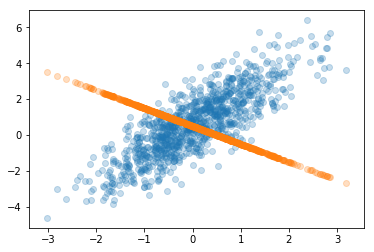

estimated w: [-1.   0.5] with loss 7079.646261002348


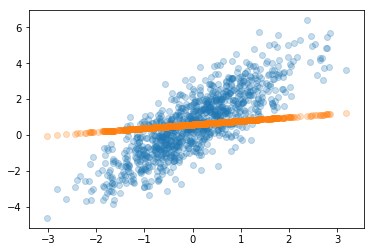

estimated w: [0.20510893 0.58267182] with loss 2648.6346324980777


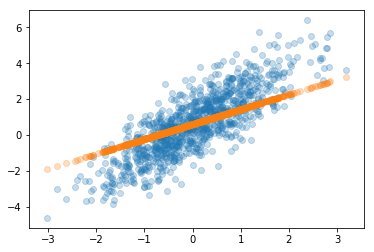

estimated w: [0.83126734 0.60437882] with loss 1455.6485715179122


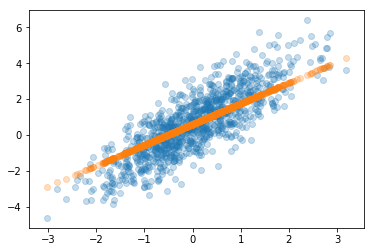

estimated w: [1.15695693 0.60503341] with loss 1133.0477648284145


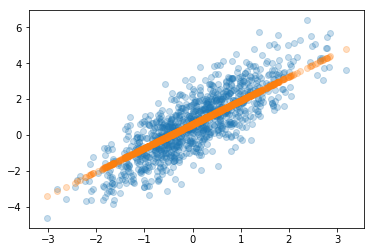

estimated w: [1.32653412 0.60005585] with loss 1045.4584287379676


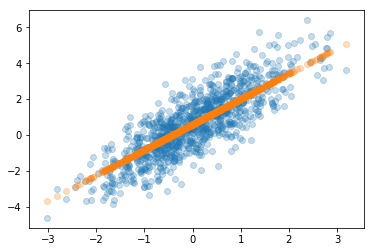

estimated w: [1.41491471 0.59480498] with loss 1021.588651551111


array([1.41491471, 0.59480498])

In [4]:
import time
import debug_tools

def get_gradient(w, X, Y):
    gradient =X.T.dot(X.dot(w) - Y)
    return gradient

def grident_desent(k, alpha, X, Y):
    w = np.array([-1,0.5])
    visualization(w)
    while k:
        k -= 1
        w -= alpha * get_gradient(w, X, Y)
        visualization(w)
        time.sleep(1)
    return w


grident_desent(5, 0.0005, X, Y)